# Pytorch Computer Vision

what are cnn?

## 0. Computer Vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models that you can leverage for your problem
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* ` torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [2]:
# Import PyTorch
import torch
from torch import nn


#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#visualization
import matplotlib.pyplot as plt
print(torch.__version__)
print(torchvision.__version__)


2.3.0+cu121
0.18.0+cu121


## Getting a dataset

Dataset : FashionMNIST from torchvision.datasets

In [3]:
# setup training data
train_data = datasets.FashionMNIST(
    root='data', #where to download data to
    train=True, #do we want the training data set
    download=True,
    transform=ToTensor(), #transform data
    target_transform=None #transofrorm label
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:12<00:00, 2123072.66it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 202558.57it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3717993.89it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7381975.04it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data),len(test_data)

(60000, 10000)

In [5]:
# see the first training example
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx


{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
#check the shape of our image
print(f'image shape:{image.shape} -> [color channels,height,width]')
print(f'image label:{class_names[label]} -> [color channels,height,width]')

image shape:torch.Size([1, 28, 28]) -> [color channels,height,width]
image label:Ankle boot -> [color channels,height,width]


### 1.2 visualizing our data

(-0.5, 27.5, 27.5, -0.5)

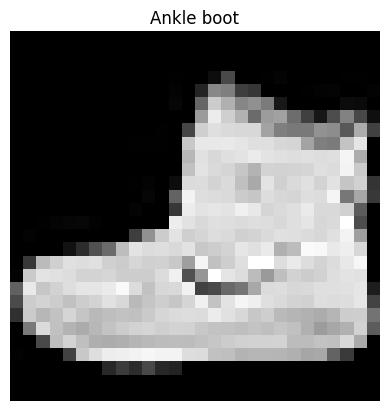

In [10]:
import matplotlib.pyplot as plt
image, label = train_data[0]
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)


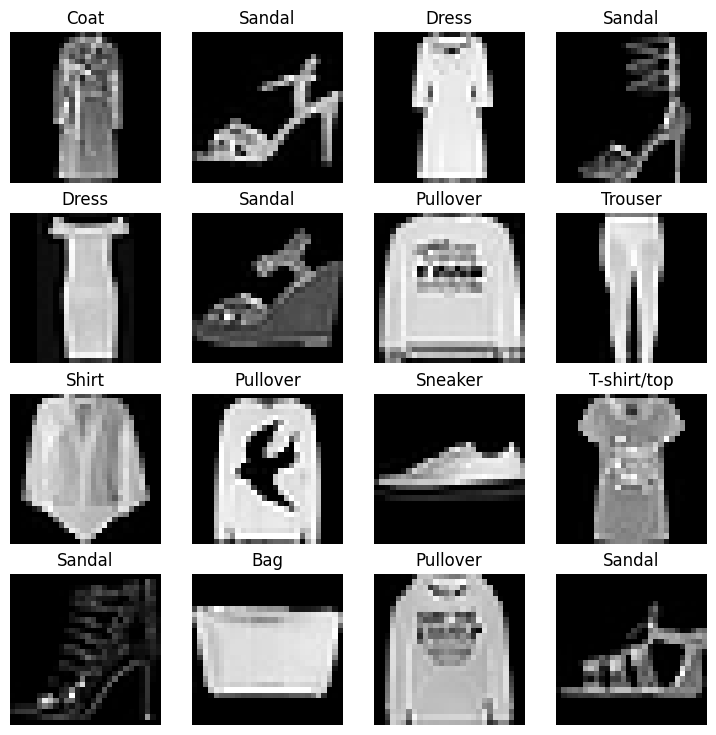

In [11]:
#plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. Preparing DataLoader

Right now, our data is in the form of PyTorch Datasets

Dataloader turns our dataset into a Pytorch iterable

More specifically, we want to turn our data into batches (or mini-batches).

Why do we want this?

1. It is more computationally efficient as in your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size is 32)
2. It gives our neural network more chances to update its gradients per epoch.



In [12]:
from torch.utils.data import DataLoader

#setup the batch size hyperparameter
BATCH_SIZE = 32

#turn datasets into iterables (batches)
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fc08741bee0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fc08741bcd0>)

In [13]:
# lets checkout what we've created
print(f'Dataloader: {train_dataloader,test_dataloader}')
print(f'Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of train_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x7fc08741bee0>, <torch.utils.data.dataloader.DataLoader object at 0x7fc08741bcd0>)
Length of train_dataloader: 1875 batches of 32
Length of train_dataloader: 313 batches of 32


In [14]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 4, label size: torch.Size([])


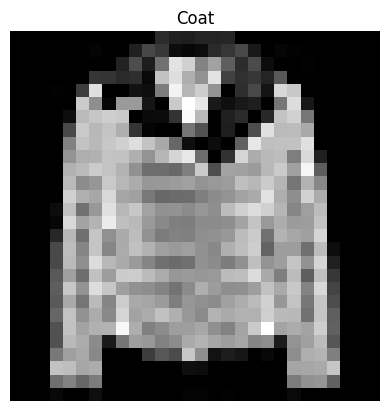

In [15]:
#show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f'Image size: {img.shape}')
print(f'Label: {label}, label size: {label.shape}')


## 3. Model 0: Build a baseline model

when starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments

In other word: start simply and add complexity when necessary.

In [16]:
# create a flatten layer
flatten_model = nn.Flatten()

#get a single sample
x=train_features_batch[0]

#flatten the sample
output = flatten_model(x) # perform forward pass

#print out what happened
print(f'Shape before flattening: {x.shape}') # -> [color_channels, height,width]
print(f'shape after flattening: {output.shape}') # -> [color_channel,height*weight]


Shape before flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [17]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0235, 0.6118, 0.7333, 0.7725, 0.7412, 0.6941, 0.0824,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000,
        0.0000, 0.0000, 0.4745, 0.9373, 0.9843, 0.9412, 0.7373, 0.9608, 0.9843,
        0.9569, 0.7216, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0824, 0.9216, 0.9059, 0.8784, 0.8941, 0.8627, 0.7059, 0.9725,
        0.8784, 0.8157, 0.9373, 0.6706, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039,
        0.0000, 0.0000, 0.8431, 0.8941, 0.8510, 0.9412, 0.7961, 0.9608, 1.0000,
        0.9882, 0.7529, 0.8314, 0.8784, 0.9255, 0.4510, 0.0000, 0.0039, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [18]:
from torch import nn
class FashionMNISTMODELV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack =  nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

#setup model with input parameters
model_0 = FashionMNISTMODELV0(
    input_shape = 784,
    hidden_units = 10,
    output_shape=len(class_names)
).to('cpu')

In [20]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer, evaluation metrics

* loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optime.SGD`
* Evaluation metric - using accuracy since multi-class

In [22]:
import requests
from pathlib import Path

#download helper function from learn pytorch repo
if Path("helper_function.py").is_file():
  print("already exists")
else:
  print("downloading the file")
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_function.py',"wb") as f:
    f.write(request.content)

downloading the file


In [23]:
# import accuracy metric
from helper_function import accuracy_fn

#setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

ML is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [24]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end: float,
                     device: torch.device=None
                     ):
  ''' prints difference between start and end time'''
  total_time = end-start
  print(f'Train time on {device}: {total_time:.3f} seconds')
  return total_time




In [25]:
start_time =  timer()
#some code
end_time = timer()
print_train_time(start=start_time,end=end_time,device='cpu')


Train time on cpu: 0.000 seconds


4.464900001721617e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the training loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happening
5. Time it all (for fun).

In [26]:
# import tqdm for progress bar
from tqdm.auto import tqdm

#set seed and start the time
torch.manual_seed(42)
train_time_start_on_cpu = timer()
#set the num of epochs (we'll keep this small for faster training time)
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n-------')

  #training
  train_loss = 0
  # add a loop to loop through the training btaches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    #1. forward pass
    y_pred = model_0(X)

    #2. calculate loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumlate train loss

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4 loss backward
    loss.backward()

    #5. optimizer step
    optimizer.step()

    if batch % 400 == 0:
      print(f'Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples')
  #divide total train loss by length of dataloader
  train_loss /= len(train_dataloader)

  ###testing
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #1. forward pass
      test_pred = model_0(X_test)

      #2. calc loss
      test_loss+=loss_fn(test_pred,y_test)

      #3. calc acc
      test_acc+= accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    #calc the test loss average per batch
    test_loss /= len(test_dataloader)

    #calc the test acc average per batch
    test_acc /= len(test_dataloader)

  print(f'\nTrain Loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc {test_acc:.4f}')

#calc training time

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_end_on_cpu,
    device=str(next(model_0.parameters()).device)
)



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train Loss: 0.5904 | Test loss: 0.5095, Test acc 82.0387
Epoch: 1
-------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train Loss: 0.4763 | Test loss: 0.4799, Test acc 83.1969
Epoch: 2
-------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train Loss: 0.4550 | Test loss: 0.4766, Test acc 83.4265
Epoch: 3
-------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train Loss: 0.4425 | Test loss: 0.4631, Test acc 83.7460
Epoch: 4
-------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples

In [27]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device):
  ''' returns dict containing the results of model predicting on data_loader'''
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y = X.to(device), y.to(device)
      #make pred
      y_pred = model(X)

      #accumulate the loss and acc value per batch
      loss += loss_fn(y_pred,y)
      acc+= accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    #scale loss and acc to find the avg loss/acc per batch

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name':model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc": acc}


  #calc model 0 results on test dataset

model_0_results = eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device="cpu"
)
model_0_results



  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTMODELV0',
 'model_loss': 0.4686937928199768,
 'model_acc': 83.2667731629393}

## 5. setup device agnostic-code (for using GPU if there is one)

In [28]:
!nvidia-smi

Thu Jul  4 00:38:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [29]:
torch.cuda.is_available()

True

In [30]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity



In [31]:
#create a model with non-linear and linear layers
class FashionMNISTMODELV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape=int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x: torch.Tensor):
    return self.layer_stack(x)



In [32]:
device

'cuda'

In [33]:
# create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTMODELV1(input_shape=784,hidden_units=10,output_shape=len(class_names)).to(device)
model_1

FashionMNISTMODELV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

### 6.1 setup loss, optimizer and evaluation metrics

In [34]:
from helper_function import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measures how wrong the model is
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1) # tries to update our model's params to reduce loss

### 6.2 Functionizing training and evaluation

In [35]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
  ''' performs a training with model trying to learn on data_loader'''

  train_loss,train_acc = 0,0
  model.train()
  # add a loop to loop through the training btaches
  for batch, (X,y) in enumerate(data_loader):

    X,y = X.to(device),y.to(device)
    #1. forward pass
    y_pred = model(X)

    #2. calculate loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumlate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4 loss backward
    loss.backward()

    #5. optimizer step
    optimizer.step()


  #divide total train loss by length of dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f'Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}\n')


In [36]:
def test_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device=device
):
  ''' performs a testing loop step on a model going over data_loader'''

  test_loss, test_acc = 0,0
  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device), y.to(device)

      test_pred = model(X)

      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f'test loss: {test_loss:.5f} | test acc: {test_acc:.2f}\n')

In [37]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n--------')
  train_step(model_1,train_dataloader,loss_fn,optimizer,accuracy_fn,device)
  test_step(model_1,test_dataloader,loss_fn,accuracy_fn,device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu,train_time_end_on_gpu,device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 1.09199 | Train acc: 61.34

test loss: 0.95636 | test acc: 65.00

Epoch: 1
--------
Train loss: 0.78101 | Train acc: 71.93

test loss: 0.72227 | test acc: 73.91

Epoch: 2
--------
Train loss: 0.67027 | Train acc: 75.94

test loss: 0.68500 | test acc: 75.02

Train time on cuda: 30.490 seconds


In [38]:
!nvidia-smi

Thu Jul  4 00:39:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0              29W /  70W |    159MiB / 15360MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [39]:
# get model_1 results dict
model_1_results = eval_model(
    model_1,
    test_dataloader,
    loss_fn,
    accuracy_fn,
    device
)

  0%|          | 0/313 [00:00<?, ?it/s]

In [40]:
model_0_results,model_1_results

({'model_name': 'FashionMNISTMODELV0',
  'model_loss': 0.4686937928199768,
  'model_acc': 83.2667731629393},
 {'model_name': 'FashionMNISTMODELV1',
  'model_loss': 0.6850008964538574,
  'model_acc': 75.01996805111821})

## Model 2: Building a convolutional neural network

In [41]:
class FashionMNISTModelV2(nn.Module):
  '''
  model archetecture that replicates the TinyVGG
  model from CNN explainer website
  '''
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
      )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape
                  )
    )
  def forward(self,x):
    x = self.conv_block_1(x)

    x = self.conv_block_2(x)

    x = self.classifier(x)
    return x

In [42]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 stepping through `nn.Conv2d`

In [43]:
torch.manual_seed(42)

#create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f'image batch shape: {images.shape}')
print(f'single image shape: {test_image.shape}')
print(f'test image: \n {test_image}')

image batch shape: torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])
test image: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [44]:
#create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, #color channels
                       out_channels=10, #hidden units
                       kernel_size=(3,3),
                       stride=1,
                       padding=0
                       )
conv_output = conv_layer(test_image)

In [45]:
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Stepping through `nn.MaxPool2d()`

In [46]:
test_image.shape

torch.Size([3, 64, 64])

In [47]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass data through conv layer
test_image_through_conv = conv_layer(test_image)
test_image_through_conv.shape

torch.Size([10, 62, 62])

In [48]:
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
test_image_through_conv_and_max_pool.shape

torch.Size([10, 31, 31])

In [49]:
torch.manual_seed(42)
#create a random tensor with a similar # of dim to our image
random_tensor = torch.randn(size=(1,1,2,2))
random_tensor


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

In [50]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)
max_pool_tensor, max_pool_tensor.shape

(tensor([[[[0.3367]]]]), torch.Size([1, 1, 1, 1]))

### 7.3 Setup a loss function and optimizer for `model_2`

In [51]:
# setup loss function/eval metrics/ optimizer
from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)


In [52]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.4 Training and testing `model_2` using our training and test functions

In [53]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

#train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'Epoch : {epoch} \n --------')
  train_step(model=model_2,
             data_loader= train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader= test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(train_time_start_model_2,train_time_end_model_2,device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 
 --------
Train loss: 0.59959 | Train acc: 78.26

test loss: 0.39816 | test acc: 85.59

Epoch : 1 
 --------
Train loss: 0.36018 | Train acc: 87.05

test loss: 0.35595 | test acc: 86.89

Epoch : 2 
 --------
Train loss: 0.32426 | Train acc: 88.30

test loss: 0.32919 | test acc: 87.85

Train time on cuda: 37.447 seconds


In [54]:
# get a results dict
model_2_results = eval_model(
    model=model_2,
    data_loader = test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3291912376880646,
 'model_acc': 87.84944089456869}

## 8. Compare model results and training time

In [55]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTMODELV0,0.468694,83.266773
1,FashionMNISTMODELV1,0.685001,75.019968
2,FashionMNISTModelV2,0.329191,87.849441


In [56]:
# add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results


,model_name,model_loss,model_acc,training_time
0,FashionMNISTMODELV0,0.468694,83.266773,51.743882
1,FashionMNISTMODELV1,0.685001,75.019968,30.489870
2,FashionMNISTModelV2,0.329191,87.849441,37.446576


Text(0, 0.5, 'model')

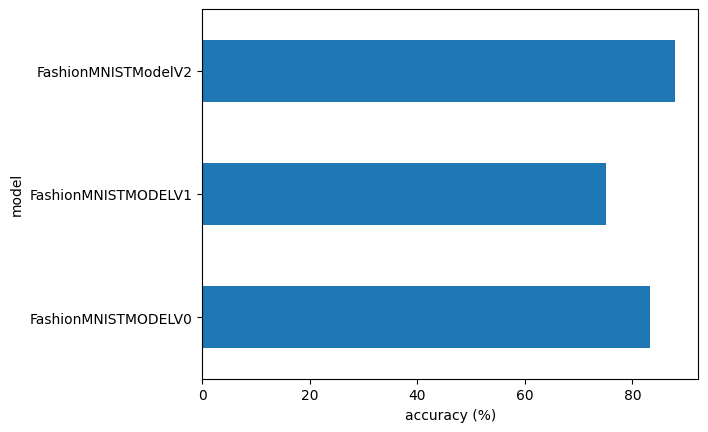

In [57]:
# visualize our model result
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [76]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare the same (add a batch dim and pass to target device")
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass
      pred_logit = model(sample)

      #get prediction prob
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      #get pred prob off gpu for further calculations
      pred_probs.append(pred_prob.cpu())

  # stack the pred_probs to turn list into atensor
  return torch.stack(pred_probs)

In [77]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape



torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

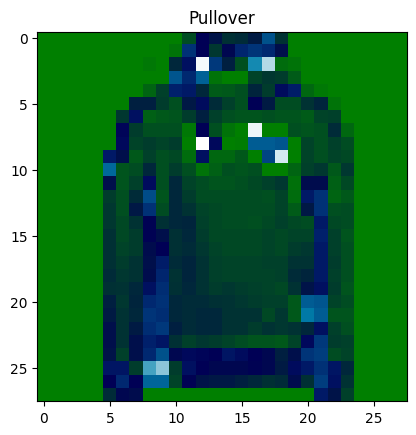

In [78]:
plt.imshow(test_samples[0].squeeze(),cmap="ocean")
plt.title(class_names[test_labels[0]])

In [79]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples,device=device)

#view first 2 prediction probp
pred_classes = pred_probs.argmax(dim=1)
pred_classes


tensor([2, 4, 6, 3, 2, 2, 0, 1, 1])

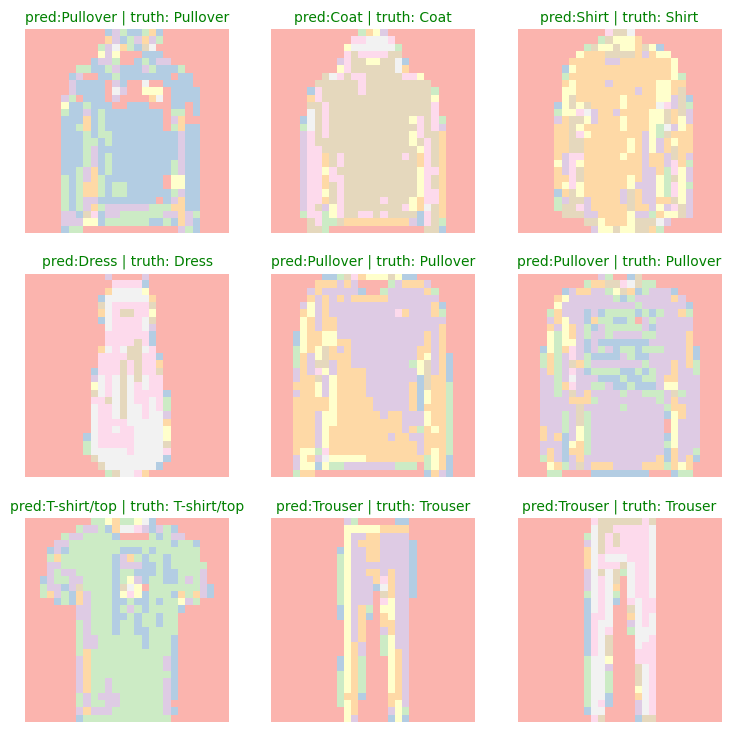

In [80]:
#plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols = 3

for i, sample in enumerate(test_samples):
  #create subplot
  plt.subplot(nrows,ncols,i+1)

  #plot target image
  plt.imshow(sample.squeeze(),cmap="Pastel1")

  #find prediction in text form
  pred_label = class_names[pred_classes[i]]

  #get the truth label in text form
  truth_label = class_names[test_labels[i]]

  #create a title for the plot

  title_text = f'pred:{pred_label} | truth: {truth_label}'

  #check for equality between pred and truth and change color of title text
  if pred_label==truth_label:
    plt.title(title_text,fontsize=10,c='g')
  else:
    plt.title(title_text,fontsize=10,c='r')
  plt.axis(False)

## 10. Making confusion matrix for further prediction evaluation

In [86]:
# import tqdm.auto
from tqdm.auto import tqdm

#1. make pred with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="making pred..."):
    X,y = X.to(device),y.to(device)
    y_logits = model_2(X)
    y_pred = torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)
    #put pred on cpu for eval
    y_preds.append(y_pred.cpu())

# concat lsit of pred into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor



making pred...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [87]:
len(y_pred_tensor)

10000

In [89]:
# see if required packages are installed and if not, install them...
try:
  import torchmetrics,mlxtend
  print(f'mlxtend version: {mlxtend.__version__}')
  assert int(mlxtend.__version__.split('.')[1] >= 19, "mlxend version should be 0.19 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics,mlxtend
  print(f'mlxtend version: {mlxtend.__version__}')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 58.1 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [90]:
import mlxtend
print(mlxtend.__version__)

0.23.1


In [92]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2 setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,target=test_data.targets)

confmat_tensor

tensor([[616,   7,  54,  64,  13,   0, 242,   0,   4,   0],
        [ 11, 866,   5,  89,  22,   0,   6,   0,   1,   0],
        [  9,   3, 810,  10,  93,   0,  69,   0,   6,   0],
        [ 26,  10,  30, 858,  40,   0,  31,   0,   4,   1],
        [  3,   5, 136,  47, 704,   0, 102,   0,   3,   0],
        [  6,   6,   3,   4,   1, 847,   5,  43,  68,  17],
        [ 64,   7, 138,  61,  87,   0, 637,   0,   6,   0],
        [  0,   2,   0,   0,   0,  35,   0, 883,  10,  70],
        [ 10,   2,  35,  13,   9,   7,  41,   6, 876,   1],
        [  1,   0,   1,   3,   0,  17,   7,  74,   9, 888]])

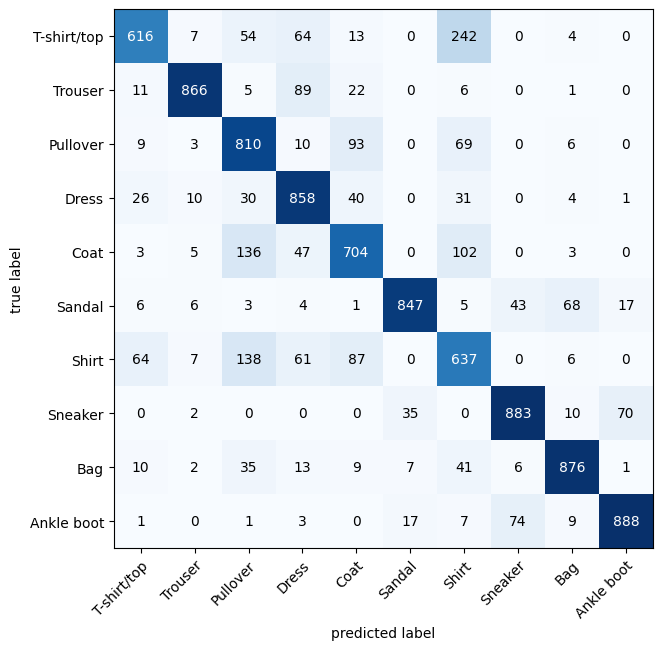

In [93]:
#3. plt the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

## 11. Save model and dataload for best perfoming model

In [95]:
from pathlib import Path

#create model directory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = "03_pytorch_cv_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#save model state dict
print(f'saving model to : {MODEL_SAVE_PATH}')

torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)


saving model to : models/03_pytorch_cv_model_2.pth


In [96]:
# create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

#load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#send moodel to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [97]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3291912376880646,
 'model_acc': 87.84944089456869}

In [99]:
# evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3291912376880646,
 'model_acc': 87.84944089456869}

In [102]:
# check if model results are close to each ther
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)


tensor(True)